In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [121]:
data =  pd.read_csv('data.csv')
data.dropna(inplace=True)
mean_quality = data.quality.mean()
is_good = (data.quality >= mean_quality).to_numpy()
data.drop(['Id','quality'],axis=1,inplace=True)

In [122]:
np_data = data.to_numpy()
# np_data = (np_data - np_data.mean()) / np_data.std()
np_data  = StandardScaler().fit_transform(np_data)
cov_matrix = np.cov(np_data,rowvar=False)

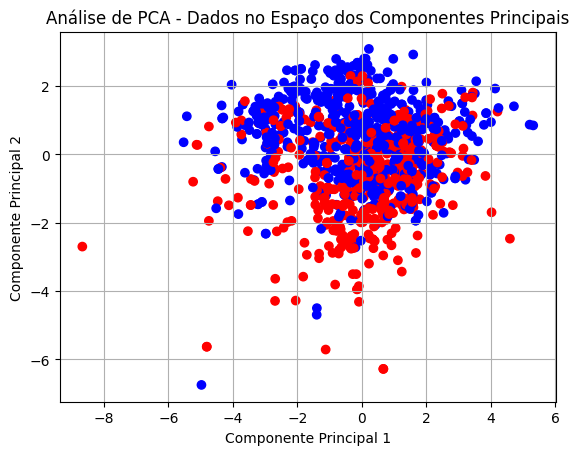

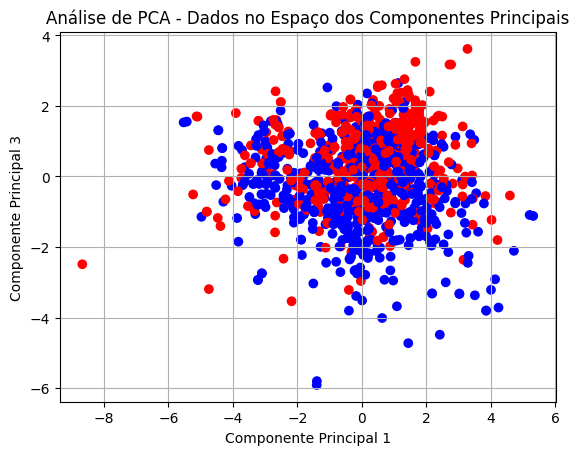

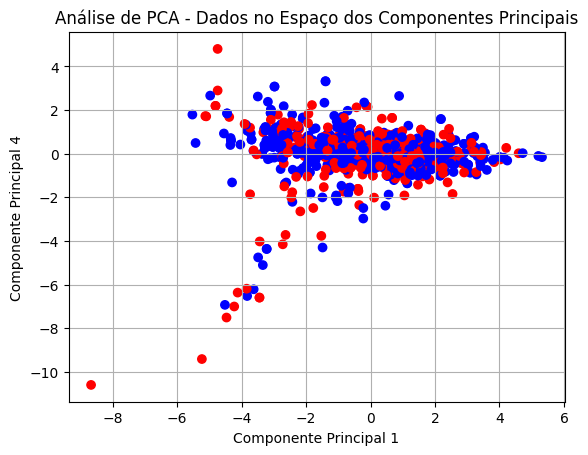

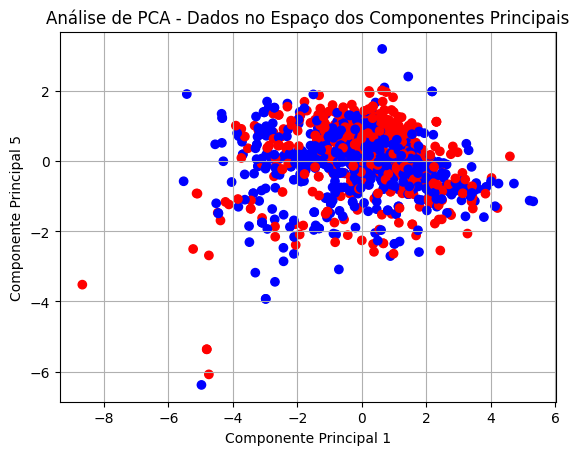

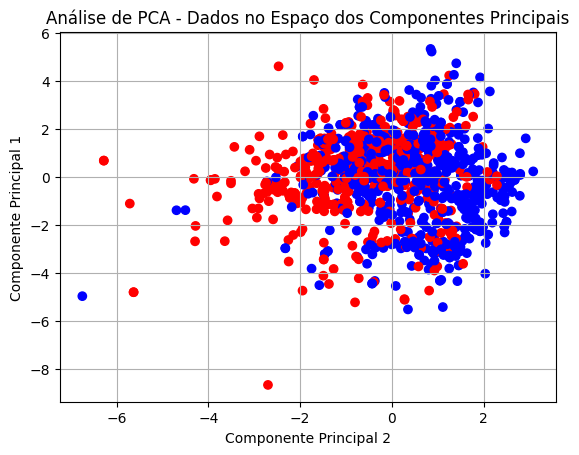

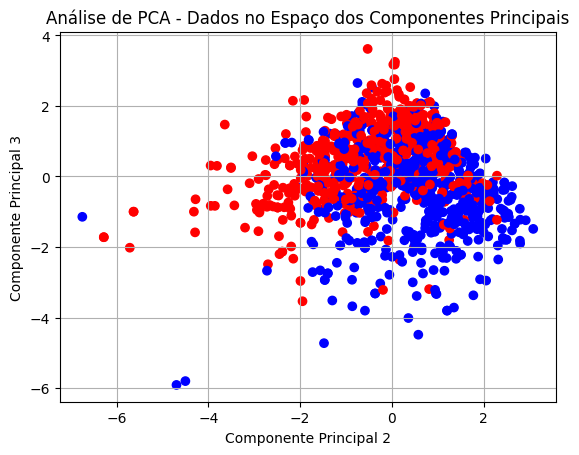

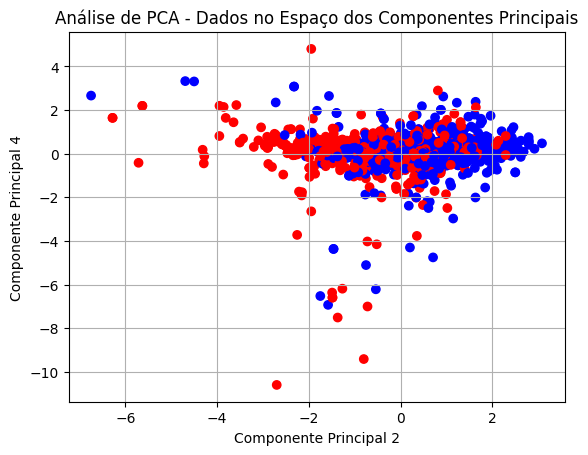

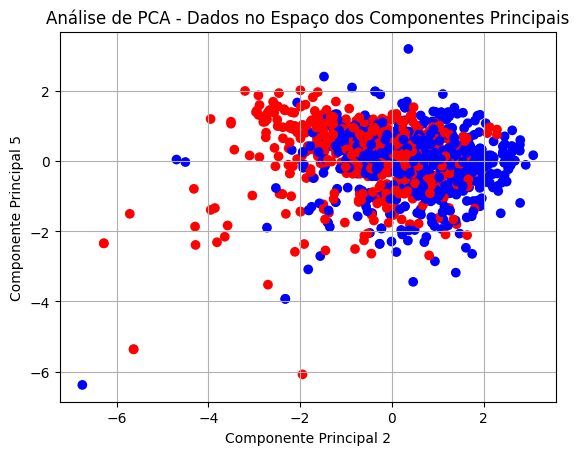

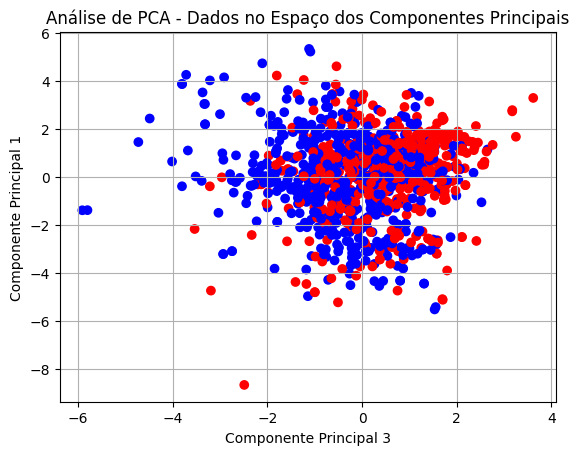

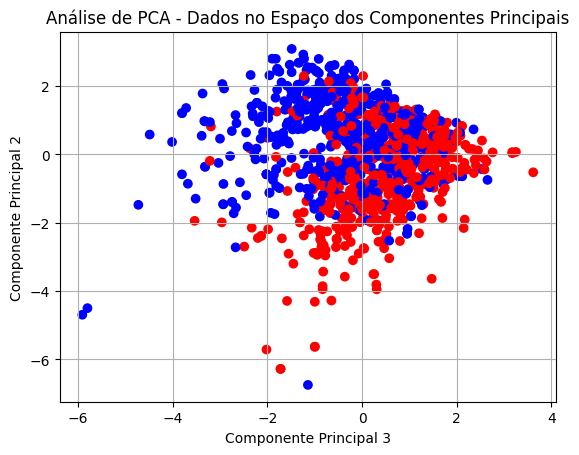

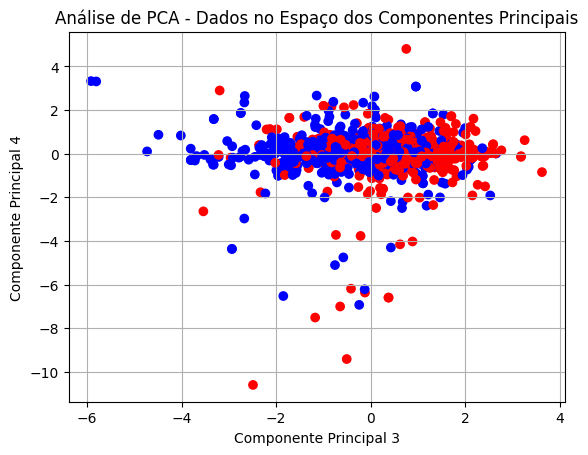

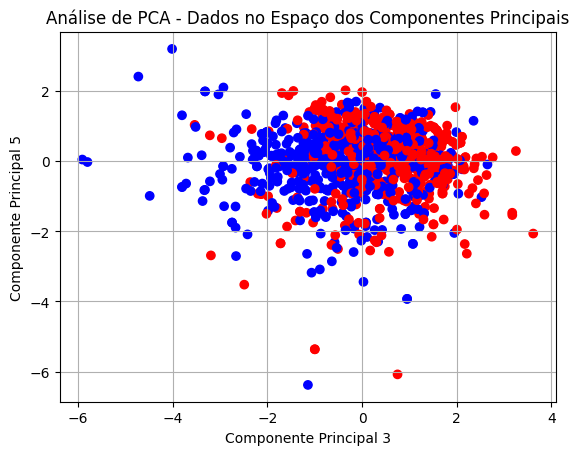

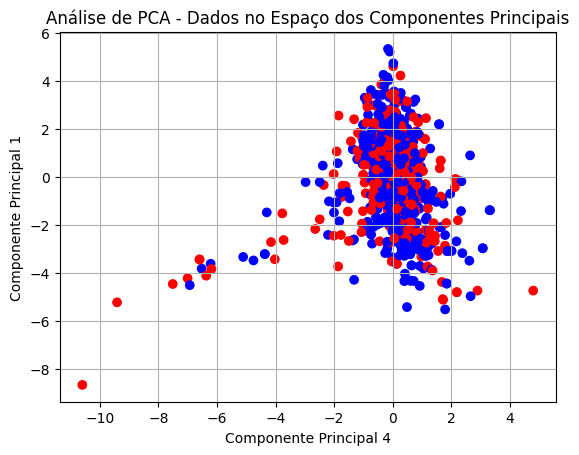

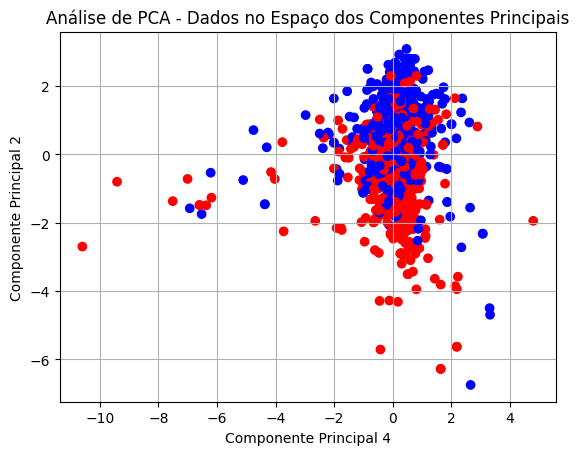

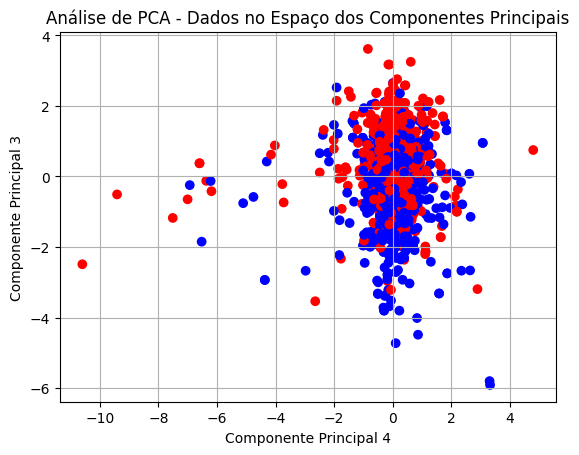

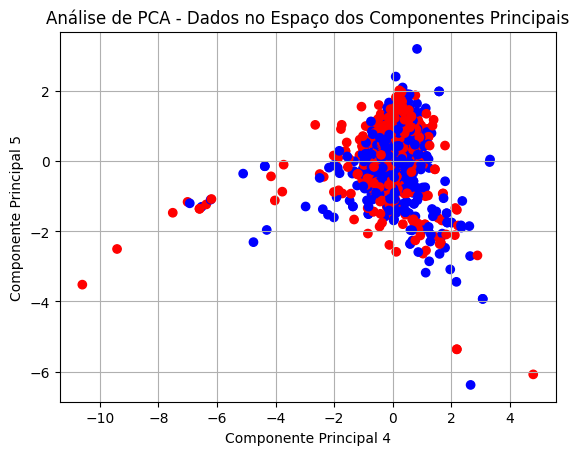

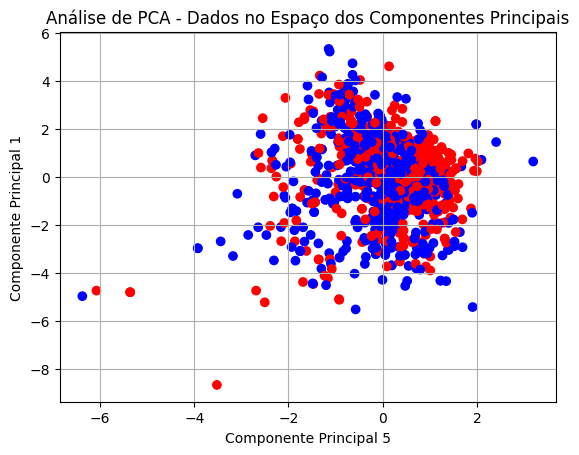

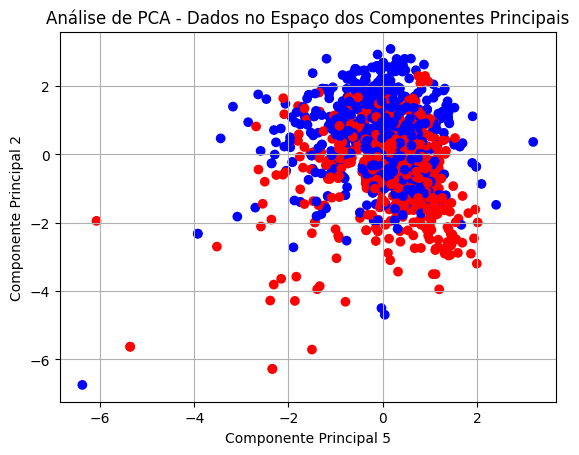

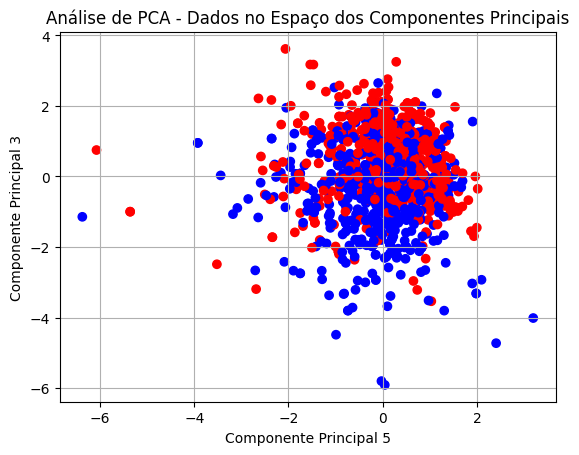

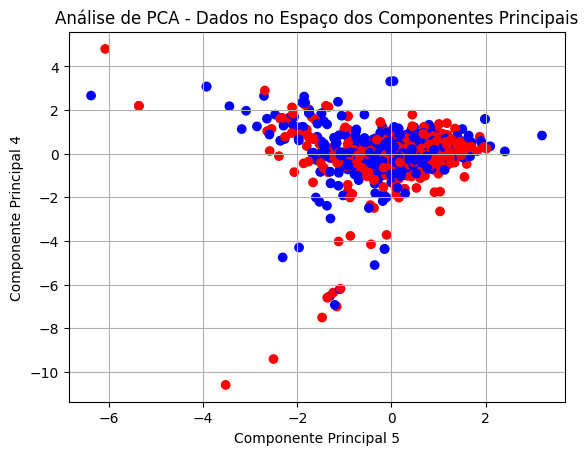

In [123]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
pca_data = np_data @ eigenvectors[:, [0,1,2,3,4]]
colors = ['blue' if good else 'red' for good in is_good]
for i in range(5):
    for j in range(5):
        if(i !=  j):
            plt.scatter(pca_data[:, i], pca_data[:, j],c=colors)
            plt.xlabel(f'Componente Principal {i+1}')
            plt.ylabel(f'Componente Principal {j+1}')
            plt.title('Análise de PCA - Dados no Espaço dos Componentes Principais')
            plt.grid(True)
            plt.show()